In [1]:
from latentneural.lorenz import LorenzGenerator
import matplotlib.pyplot as plt
import numpy as np
from latentneural.legacy import psid
from latentneural.legacy.psid.evaluation import evalPrediction

In [2]:
g: LorenzGenerator = LorenzGenerator()
time, behaviour, spikes, rates, behaviour_w, neural_w, latent = g.generate_spikes_and_behaviour(
    stop=1,
    n=30, # Number of neurons
    base=5, # Base frequency in Hz
    l=2, # Lorenz latent variables encoded in neural activity
    b=2, # Lorenz latent variables encoded in behavioural activity
    y=3, # Behavioural channels
    trials=5, # Number of trials to be tested
    seed=12345,
    conditions=1 # Number of conditions to be tested
)

In [3]:
sys = psid.PSID(
    [spikes[0,0,:,:], spikes[0,1,:,:], spikes[0,2,:,:], spikes[0,3,:,:]], 
    [behaviour[0,0,:,:], behaviour[0,1,:,:], behaviour[0,2,:,:], behaviour[0,3,:,:]],
    nx=2, n1=2, i=10)

train_pred_behaviour, train_pred_neural, train_pred_latent = sys.predict(spikes[0,0,:,:])

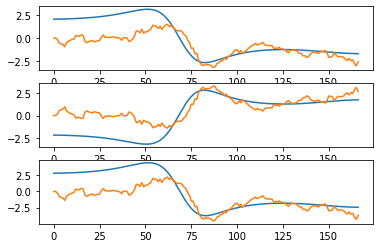

Prediction CC:  0.8308113158873414
Neural CC:  0.2216931531545542


In [4]:
fig, ax = plt.subplots(3)
ax[0].plot(behaviour[0,0,:,0])
ax[0].plot(train_pred_behaviour[:,0])
ax[1].plot(behaviour[0,0,:,1])
ax[1].plot(train_pred_behaviour[:,1])
ax[2].plot(behaviour[0,0,:,2])
ax[2].plot(train_pred_behaviour[:,2])
plt.show()

print('Prediction CC: ', np.mean(evalPrediction(train_pred_behaviour, behaviour[0,0,:,:], 'CC')))
print('Neural CC: ', np.mean(evalPrediction(train_pred_neural, spikes[0,0,:,:], 'CC')))

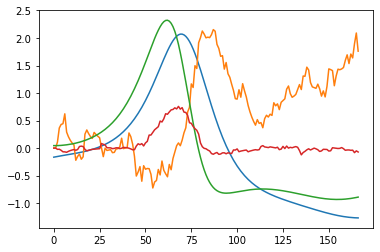

In [5]:
fig, ax = plt.subplots(1)
ax.plot(latent[0,0,:,0])
ax.plot(train_pred_latent[:,0])
ax.plot(latent[0,0,:,1])
ax.plot(train_pred_latent[:,1])
plt.show()

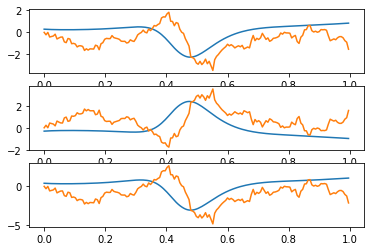

CC:  0.36050488331810676
CC:  0.1311885396731135


In [6]:
pred_behaviour, pred_neural, pred_latent = sys.predict(spikes[0,4,:,:])

fig, ax = plt.subplots(3)
ax[0].plot(time, behaviour[0,4,:,0])
ax[0].plot(time, pred_behaviour[:,0])
ax[1].plot(time, behaviour[0,4,:,1])
ax[1].plot(time, pred_behaviour[:,1])
ax[2].plot(time, behaviour[0,4,:,2])
ax[2].plot(time, pred_behaviour[:,2])
plt.show()

print('CC: ', np.mean(evalPrediction(pred_behaviour, behaviour[0,4,:,:], 'CC')))
print('CC: ', np.mean(evalPrediction(pred_neural, spikes[0,4,:,:], 'CC')))